In [1]:
using DataFrames
using Plots
using CategoricalArrays
using Random
using Imbalance
using MLJBase: machine, transform

include("./utils.jl")

plot_data

### 1. Generate Random Data

In [2]:
rng = Random.default_rng()

num_rows = 50
num_features = 2
probs = [0.5, 0.2, 0.3]

X, y = generate_imbalanced_data(num_rows, num_features; probs, type="DF")



Xm = Tables.matrix(X)

50×2 Matrix{Float64}:
 0.0884268  0.808257
 0.180498   0.218342
 0.162598   0.0916601
 0.226242   0.845625
 0.559211   0.398408
 0.807708   0.00703007
 0.501846   0.464257
 0.451544   0.281888
 0.0790012  0.520277
 0.579049   0.393317
 ⋮          
 0.478913   0.25449
 0.336344   0.737144
 0.147054   0.631678
 0.251545   0.620846
 0.534025   0.119808
 0.980623   0.565964
 0.931265   0.290336
 0.375276   0.762565
 0.834599   0.922266

### 2. Apply Random Oversample

In [3]:
Xover, yover = random_oversample(Xm, y; ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=rng)
mach = machine(RandomOversampler( ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=rng))
Xover, yover = transform(mach, X, y)

(87×2 DataFrame
 Row │ Column1    Column2    
     │ Float64    Float64    
─────┼───────────────────────
   1 │ 0.0884268  0.808257
   2 │ 0.180498   0.218342
   3 │ 0.162598   0.0916601
   4 │ 0.226242   0.845625
   5 │ 0.559211   0.398408
   6 │ 0.807708   0.00703007
   7 │ 0.501846   0.464257
   8 │ 0.451544   0.281888
  ⋮  │     ⋮          ⋮
  81 │ 0.284118   0.686268
  82 │ 0.979272   0.390185
  83 │ 0.979272   0.390185
  84 │ 0.866339   0.514016
  85 │ 0.859177   0.370451
  86 │ 0.284118   0.686268
  87 │ 0.979272   0.390185
              72 rows omitted, CategoricalValue{Int64, UInt32}[0, 2, 0, 2, 0, 0, 0, 0, 2, 0  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### 3. Plot the Results

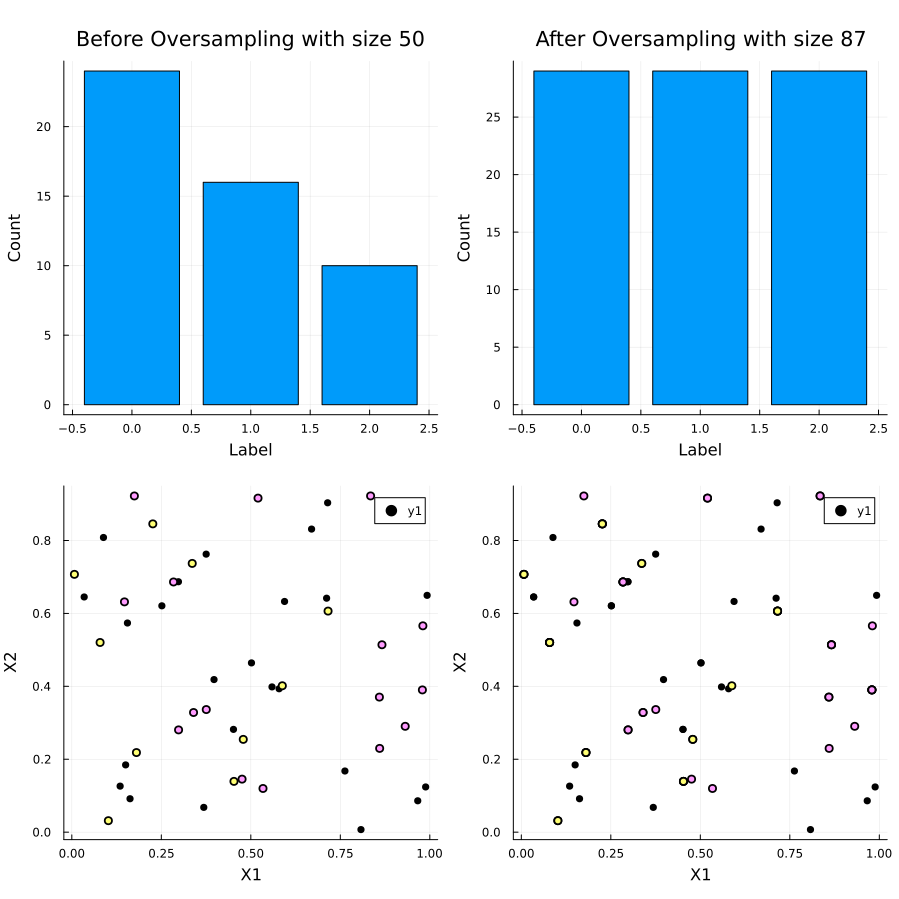

In [4]:
plot_data(y, yover, X, Xover)